# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [ ]:
#Sua resposta aqui
import seaborn as sns
import pandas as pd

df = pd.read_csv("/content/sample_data/carros.csv")

print(df.head(15))
print("-="*15)

df.info()
print("-="*15)

tipos = [str(dtype) for dtype in df.dtypes.unique()]
print(f"Existe {len(df)} dados no dataset.\nExiste {df.shape[1]} atributos no dataset.\nExiste {df.isnull().sum().sum()} dados faltantes.\nOs tipos de dados são:", end=" ")
print(*tipos)

df = df.dropna()


            Brand     Price       Body  Mileage/1000  EngineV Engine Type  \
0             BMW    4200.0      sedan           277     2.00      Petrol   
1   Mercedes-Benz    7900.0        van           427     2.90      Diesel   
2   Mercedes-Benz   13300.0      sedan           358     5.00         Gas   
3            Audi   23000.0  crossover           240     4.20      Petrol   
4          Toyota   18300.0  crossover           120     2.00      Petrol   
5   Mercedes-Benz  199999.0  crossover             0     5.50      Petrol   
6             BMW    6100.0      sedan           438     2.00         Gas   
7            Audi   14200.0      vagon           200     2.70      Diesel   
8         Renault   10799.0      vagon           193     1.50      Diesel   
9      Volkswagen    1400.0      other           212     1.80         Gas   
10        Renault   11950.0      vagon           177     1.50      Diesel   
11        Renault    2500.0      sedan           260     1.79      Petrol   

2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [ ]:
#Sua resposta aqui
df.rename(columns = {'Mileage/1000':'Quilometros', 'Brand':'Marca', 'Price':'Preço', 'Body':'Corpo', 'EngineV':'Motor', 'Engine Type':"Combustivel", 'Registration':'Fabricação', 'Year':'Ano', 'Model':"Modelo" }, inplace = True)
df["Quilometros"] = df["Quilometros"] * 1000 * 1.6093
df

,Marca,Preço,Corpo,Quilometros,Motor,Combustivel,Fabricação,Ano,Modelo
0,BMW,4200.0,sedan,445776.1,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,687171.1,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,576129.4,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,386232.0,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,193116.0,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,56325.5,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,14483.7,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1609.3,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,312204.2,2.0,Petrol,yes,1985,520


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

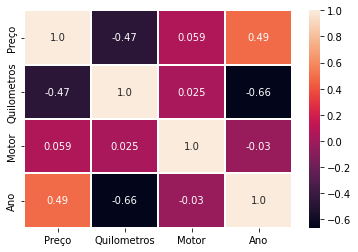

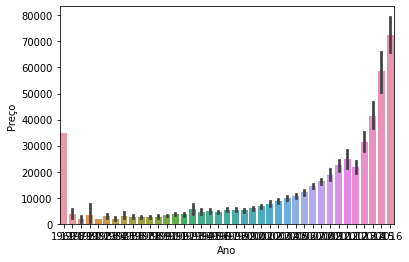

<Axes: xlabel='Motor', ylabel='Preço'>

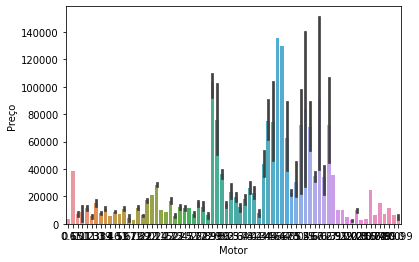

In [ ]:
import matplotlib.pyplot as plt

#Sua resposta aqui
correlacao = df.corr()
sns.heatmap(correlacao, annot = True, fmt=".2", linewidths=.2)
plt.show()

#Preço se relaciona com ano e com EngineV
sns.barplot(data = df, x="Ano", y="Preço")
plt.show()

sns.barplot(data = df, x="Motor", y="Preço")

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Resposta: Modelo supervisionado, por estarmos utilizamos parte dos dados que já sabemos a resposta para treinar nosso modelo

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta: *A técnica que deverá ser usada nesse projeto é o de regressão, por estarmos tratando de valores numéricos.*

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: Random Forest

Algoritmo 2: Gradient Boost

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [ ]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()

df = df.drop(columns=['Fabricação', 'Modelo'])
df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns=['Preço'])
y = df['Preço']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
display(df_copy.head(5))

df.head(5)

,Marca,Preço,Corpo,Quilometros,Motor,Combustivel,Fabricação,Ano,Modelo
0,BMW,4200.0,sedan,445776.1,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,687171.1,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,576129.4,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,386232.0,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,193116.0,2.0,Petrol,yes,2011,Rav 4


,Preço,Quilometros,Motor,Ano,Marca_BMW,Marca_Mercedes-Benz,Marca_Mitsubishi,Marca_Renault,Marca_Toyota,Marca_Volkswagen,Corpo_hatch,Corpo_other,Corpo_sedan,Corpo_vagon,Corpo_van,Combustivel_Gas,Combustivel_Other,Combustivel_Petrol
0,4200.0,445776.1,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,7900.0,687171.1,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,13300.0,576129.4,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,23000.0,386232.0,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18300.0,193116.0,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1


7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [ ]:
#Sua resposta aqui
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

rfr = RandomForestRegressor(n_estimators=20, max_depth=3, random_state=42)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_pred - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test,y_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test,y_pred) )

Soma dos Erros ao Quadrado (SSE): 96193452866 
Erro Quadrático Médio (MSE): 119494972.50
Erro Médio Absoluto (MAE): 6281.15
Raiz do Erro Quadrático Médio (RMSE): 10931.38 
R2-score: 0.82


7.2 - Algoritmo 2:  (0,5)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_pred - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test,y_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_pred))
print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test,y_pred) )

Soma dos Erros ao Quadrado (SSE): 43483462664 
Erro Quadrático Médio (MSE): 54016723.81
Erro Médio Absoluto (MAE): 4145.09
Raiz do Erro Quadrático Médio (RMSE): 7349.61 
R2-score: 0.92


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta: O que foi utilizado o Gradient Boost teve um score maior. Isso pode ter ocorrido por conta dos dados que foram utilizados ou da forma que o próprio algoritmo usou os dados.

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [ ]:
#Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?
vw_sedan = pd.DataFrame({})

tabela = X.columns.tolist()
for i in tabela:
  if i == 'Quilometros':
    vw_sedan[i] = [172095]
  elif i == 'Motor':
    vw_sedan[i] = [2.0]
  elif i == 'Ano':
    vw_sedan[i] = [2005]
  elif i == 'Marca_Volkswagen':
    vw_sedan[i] = [1]
  elif i == 'Corpo_sedan':
    vw_sedan[i] = [1]
  elif i == 'Combustivel_Gas':
    vw_sedan[i] = [1]
  else:
    vw_sedan[i] = [0]

preco = gbr.predict(vw_sedan)[0]
print(f"O veículo Volkswagen Sedan 2.0, ano 2005, com cerca de 172095 km rodados poderia ser vendido por R${preco:.2f}")

O veículo Volkswagen Sedan 2.0, ano 2005, com cerca de 172095 km rodados poderia ser vendido por R$11057.31
